# Isopletas de un escape súbito



## Modelo 
Este modelo determina la localización de las isopletas de una nube después de un tiempo





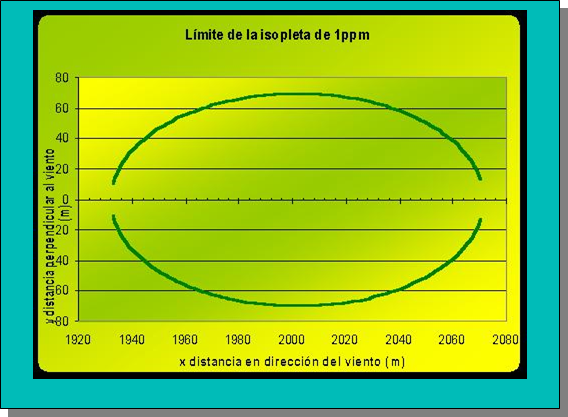

## Variables
|Variable|Significado|Unidades|
|------|------|------|
|G|		Velocidad de descarga		|kg|
|t|		Tiempo		|	s|
|PM	|	Peso molecular del gas	|		kg/kgmol|
|T|		Temperatura		|	K|
|P	|	Presión		|atm|
|H|		Altura de la descarga		|	m|
|i|		Incrementos		|	m|
|Ni	|	Número de incrementos		|50	|
|Cisop|		Concentración de la isopleta		|	ppm|
|U|		Velocidad del viento		|	m/s|
|Rg	|	Constante de los gases		|	L*atm/mol*K|




## Variables a calcular

|Variable|Significado|Unidades|
|------|------|------|
|sx,sy,sz	|	Coef. de Disperción en  X,Y & Z||		
|C	|	Concentración del gas		|ppm|
|x|		Distancia  en dirección del  viento	||	
|yl	|	Localización de la isopleta	|	m|



## Incógnitas


|Variable|Significado|Unidades|
|------|------|------|
|yl	|	Localización de la isopleta	|	m|



### Consideraciones
-La liberación es continua 

-Determina la concentración del material considerando a "x" distancia favor del viento, 

"y" distancia en contra o transversal del viento y  "z" distancia de altura del suelo. 

-Los coeficientes de distribución de  y & x son iguales, es decir $\sigma x = \sigma y$









## Desarrollo y ecuaciones

El modelo de soplo (puff) describe una descarga instántanea de un gas. 

Este modelo depende de las condiciones atmosféricas (si), la altura de la descarga (z) 

y de la chimenea (H), la velocidad del viento (u).

- Ecuación 1.  ${C}(x,y,z,t)=\frac{G}{(2\pi)^{3/2} \sigma_x \sigma_y \sigma_z}exp[\frac{-1}{2}(\frac{y}{\sigma_y})^2]*(exp[\frac{-1}{2}(\frac{z-H}{\sigma_Z})^2]+exp[\frac{-1}{2}(\frac{z+H}{\sigma_Z})^2])$


como las condiciones para H, y, z son cero, la ecuación 1 se reduce a :

- Ecuación 2.  ${C}(x,0,0)=\frac{G}{\sqrt{2}(\pi)^{3/2} \sigma_x \sigma_y \sigma_z}$



Para el cálculo de $\sigma$ según la estabilidad y la condición

|Clase de estabilidad|$\sigma_y o \sigma_x$|$\sigma_z$|
|------|------|------|
	|$A	$	|$0.18x^{0.92}$		|$0.60x^{0.75}$|		
	|$B$	|	$0.14x^{0.92}$	|$0.53x^{0.73}$|	
	|$C$|		$0.10x^{0.92}$	|$0.34x^{0.71}$|		
	|$D$|		$0.06x^{0.92}$	|$0.15x^{0.70}$|		
	|$E$|		$0.04x^{0.92}$	|$0.10x^{0.65}$|	
	|$F$	|   $0.02x^{0.89}$  |$0.05x^{0.61}$|

-A: Condiciones extremadamente inestables.

-B: Condiciones moderadamente inestables.

-C: Condiciones ligeramente inestables.

-D: Condiciones neutras.

-E: Condiciones estables.

-F: Condiciones muy estables.


El centro del soplo es localizada como:

- Ecuación 3.$x=ut$

Si el sistema de coordenadas se encuentra en el punto de descarga, la Ec. 2 se multiplica por el factor:

- Ecuación 4.  $exp[\frac{-1}{2}(\frac{x-ut}{\sigma_Z})^2$

El factor (x-ut) representa el ancho del soplo.

Sabemos que la Ec. 1 estima una concentración promedio en todas direcciones (y,x,z), 

es decir si hablamos de la concentración a lo largo del centro del soplo quiere decir {C}(x,0,0) 

o si es la concentración de la isopleta(límites o líneas de la nube {C}(x,y,0) ).

La localización de la isopleta  se puede encontrar dividiendo la ecuación de 

la concentración {C}(x,0,0) entre la concentración de la isopleta  {C}(x,y,0), 

el resultado del cociente y resolviendo para "y" que es la distancia 

del centro del soplo a la isopleta la ecuación es:

$yi=\sigma_y \sqrt{2 ln \frac{{C}(x,0,0)}{{C}(x,0,0)}}$

- Ecuación 5. $ yi=\sigma_y \sqrt{2 ln \frac{C}{C_{isop}}}$

Por la simetría, recordemos que existe una distancia positiva y negativa, útil para graficar la isopleta.

## Resultados


In [1]:
#Datos
G=50 #kg
t=1000#s
PM=30 #kg/kmol
T= 298#k
H=0#m
i=1.6#m
Ni=50
Cisop=1#ppm
u=2 #m/s
R=0.082#Latm/ mol K
P=1#atm


Se calcula la x utilizando la ecuación 3:

In [2]:
x=u*t
print("x= "+ str(x)+" m")

x= 2000 m


Cambiar las unidades de $C_{isop}$ a $ mg/m^3$:

$ C_{mg/m^3}=(\frac{PM* P}{T* R})*C_{ppm}$

In [3]:
C_new=Cisop*P*PM/(T*R)
print("C isop= "+ str(round(C_new,2))+" mg/m^3")

C isop= 1.23 mg/m^3


# Primera forma: 
## Hacemos una función, de tal manera que ya solo tengas que poner los datos dentro de la función y los puedes cambiar cuando quieras y automaticamente, te sale la tabla y la gráfica. 

In [4]:
#Librerías a utilizar 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
def Tabla(n,i,Ni,u,t,Cisop,P,PM,T,R,G,H):
    Tablas_1=[]
    Tablas_2=[]
    Tablas_3=[]
    x=u*t
    C_new=Cisop*P*PM/(T*R)
    n=100
    r=-i*Ni
    print('{:^10}''{:^10}''{:^10}''{:^10}''{:^10}''{:^10}''{:^10}'.format('Distancia del centro',' X[m]',' sy[m]','   sz[m]',' C[mg/m^3]','+yi','-yi'))
    for j in range(n):
        r+=i
        x2=r+x
        sy=0.02*x2**(0.89)
        sz=0.05*x2**(0.61)
        C_final=G*10**6*np.exp(-0.5*(H/sz)**2)*np.exp(-0.5*((x2-x)/sy)**2)/(7.874805*sy*sy*sz)
        if C_final>C_new:
            y=sy*np.sqrt(2*np.log(C_final/C_new))
            y=round(y,3)
            my=-1*y
        else:
            y=0.0
            my=0.0
        print('{:^10.2f}''           {:^10.2f}''{:^10.2f}''{:^10.2f}''{:^10.2f}''{:^10}''{:^10}'.format(r,x2,sy,sz,C_final,y,my))  
   #Aqui vamos a graficar: X vs +yi y X vs-yi
        Tablas_1.append(x2)
        Tablas_2.append(y)
        Tablas_3.append(my)
    
    plt.plot(Tablas_1,Tablas_2,'blue')
    plt.plot(Tablas_1,Tablas_3,'red')
    plt.title('Límite de la isopleta de 1ppm')
    plt.xlabel('x distancia en dirección del viento (m)')
    plt.ylabel('y distancia perpendicular al viento(m)')
    plt.show()


Distancia del centro   X[m]      sy[m]      sz[m]  C[mg/m^3]   +yi       -yi    
  -78.40              1921.60    16.73      5.04      0.08      0.0       0.0    
  -76.80              1923.20    16.74      5.04      0.12      0.0       0.0    
  -75.20              1924.80    16.75      5.04      0.19      0.0       0.0    
  -73.60              1926.40    16.77      5.04      0.29      0.0       0.0    
  -72.00              1928.00    16.78      5.05      0.45      0.0       0.0    
  -70.40              1929.60    16.79      5.05      0.68      0.0       0.0    
  -68.80              1931.20    16.80      5.05      1.02      0.0       0.0    
  -67.20              1932.80    16.82      5.05      1.51     10.892   -10.892  
  -65.60              1934.40    16.83      5.06      2.23     18.353   -18.353  
  -64.00              1936.00    16.84      5.06      3.24     23.45     -23.45  
  -62.40              1937.60    16.85      5.06      4.66     27.529   -27.529  
  -60.80         

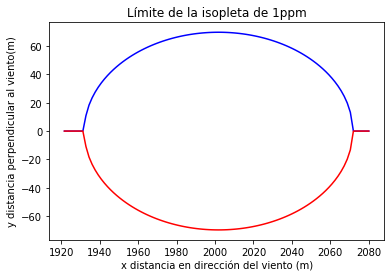

In [6]:
#Así llamas a la función de arriba.
Tabla(100,1.6,50,2,1000,1,1,30,298,0.082,50,0)
